# Run a shell script for data extraction (Recommend to run __on a GPU__)

In [1]:
!bash ./run.sh

Running data_extract.py ...
The current process just got forked. Disabling parallelism to avoid deadlocks...
To disable this warning, please explicitly set TOKENIZERS_PARALLELISM=(true | false)
100%|███████████████████████████████████████| 992/992 [00:00<00:00, 6410.84it/s]
Running check_dispersion.py ...
The current process just got forked. Disabling parallelism to avoid deadlocks...
To disable this warning, please explicitly set TOKENIZERS_PARALLELISM=(true | false)
100%|█████████████████████████████████████████| 992/992 [03:49<00:00,  4.32it/s]
Running re-examine.py ...
The current process just got forked. Disabling parallelism to avoid deadlocks...
To disable this warning, please explicitly set TOKENIZERS_PARALLELISM=(true | false)
100%|█████████████████████████████████████████| 992/992 [07:16<00:00,  2.27it/s]
Running relation_between_alpha_fx.py ...
The current process just got forked. Disabling parallelism to avoid deadlocks...
To disable this warning, please explicitly set TOKE

# Run below codes to reproduce each experiment result

In [2]:
import torch
from transformers import BertTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import random

# Section 4.1: Check the dispersion of $\lVert x\rVert$ and $\lVert f(x)\rVert$

In [3]:
x_norm_lis = torch.load("./work/check_dispersion/x_norm_lis.pt")
fx_norm_lis = torch.load("./work/check_dispersion/fx_norm_lis.pt")

In [4]:
print("-----dispersion of ||x||-----")
print("\t\t  μ \t σ \t CV \t Max \t Min")
mean_lis = []
std_lis = []
cv_lis = []
for l in range(12):
    std = np.std(x_norm_lis[l])
    std_lis.append(std)
    mean = np.mean(x_norm_lis[l])
    mean_lis.append(mean)
    cv = std/mean
    cv_lis.append(cv)
    maximam = np.max(x_norm_lis[l])
    minimam = np.min(x_norm_lis[l])
    print(f"layer {str(l+1).rjust(2)}\t{mean:.2f}\t{std:.2f}\t{cv:.2f}\t{maximam:.2f}\t{minimam:.2f}")
print(f"Average \t{sum(mean_lis)/len(mean_lis):.2f}\t{sum(std_lis)/len(std_lis):.2f}\t{sum(cv_lis)/len(cv_lis):.2f}")

-----dispersion of ||x||-----
		  μ 	 σ 	 CV 	 Max 	 Min
layer  1	15.62	1.76	0.11	20.92	11.87
layer  2	18.33	2.16	0.12	20.87	12.05
layer  3	20.18	2.89	0.14	24.06	12.76
layer  4	19.77	2.53	0.13	23.51	12.67
layer  5	20.46	1.70	0.08	22.49	10.70
layer  6	21.18	1.77	0.08	23.27	10.12
layer  7	21.64	1.40	0.06	23.03	11.87
layer  8	21.47	1.50	0.07	23.05	10.91
layer  9	20.56	1.62	0.08	25.22	9.47
layer 10	19.60	2.54	0.13	29.20	7.46
layer 11	19.91	4.20	0.21	29.60	4.25
layer 12	20.49	4.62	0.23	32.84	4.13
Average 	19.93	2.39	0.12


In [5]:
print("-----dispersion of ||f(x)||-----")
print("\t\t\t  μ \t σ \t CV \t Max \t Min")
mean_lis = []
std_lis = []
cv_lis = []
for l in range(12):
    for h in range(12):
        std = np.std(fx_norm_lis[l][h])
        std_lis.append(std)
        mean = np.mean(fx_norm_lis[l][h])
        mean_lis.append(mean)
        cv = std/mean
        cv_lis.append(cv)
        maximam = np.max(fx_norm_lis[l][h])
        minimam = np.min(fx_norm_lis[l][h])
        print(f"layer {str(l+1).rjust(2)} head {str(h+1).rjust(2)}\t{mean:.2f}\t{std:.2f}\t{cv:.2f}\t{maximam:.2f}\t{minimam:.2f}")
print(f"Average\t\t\t{sum(mean_lis)/len(mean_lis):.2f}\t{sum(std_lis)/len(std_lis):.2f}\t{sum(cv_lis)/len(cv_lis):.2f}")

-----dispersion of ||f(x)||-----
			  μ 	 σ 	 CV 	 Max 	 Min
layer  1 head  1	3.99	0.75	0.19	7.88	1.74
layer  1 head  2	3.34	0.79	0.24	6.78	1.62
layer  1 head  3	4.51	0.71	0.16	7.54	0.64
layer  1 head  4	3.93	0.76	0.19	6.28	0.82
layer  1 head  5	3.93	0.82	0.21	7.88	1.38
layer  1 head  6	4.06	0.90	0.22	7.06	1.04
layer  1 head  7	3.35	0.75	0.22	6.03	1.71
layer  1 head  8	3.61	0.89	0.25	7.21	1.59
layer  1 head  9	3.95	0.65	0.17	6.14	1.97
layer  1 head 10	4.29	0.92	0.21	6.69	1.67
layer  1 head 11	4.33	0.72	0.17	6.41	1.25
layer  1 head 12	3.46	0.83	0.24	7.36	1.05
layer  2 head  1	3.89	1.11	0.28	8.55	1.11
layer  2 head  2	5.03	0.71	0.14	7.73	1.10
layer  2 head  3	4.17	0.87	0.21	8.49	1.01
layer  2 head  4	4.26	1.59	0.37	12.66	0.96
layer  2 head  5	4.45	0.66	0.15	6.77	0.70
layer  2 head  6	4.70	0.84	0.18	9.48	0.81
layer  2 head  7	4.00	0.50	0.12	6.15	1.35
layer  2 head  8	5.30	1.81	0.34	13.64	0.91
layer  2 head  9	4.49	0.87	0.19	8.37	1.26
layer  2 head 10	4.82	0.86	0.18	9.32	1.51
layer  2 head

# Section 4.2: Re-examining Clark et al's observation

## Comparison in a layer-level

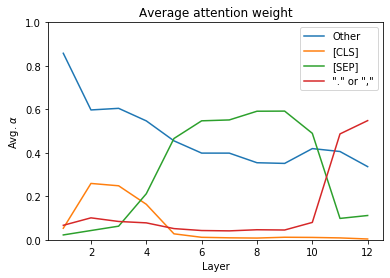

In [6]:
plt.figure()
i = 0
label = ["Other", "[CLS]", "[SEP]", '"." or ","']
cls_a_layer_lis = torch.load("./work/re-examine/cls_a_layer_lis")
sep_a_layer_lis = torch.load("./work/re-examine/sep_a_layer_lis")
cp_a_layer_lis = torch.load("./work/re-examine/cp_a_layer_lis")
other_a_layer_lis = torch.load("./work/re-examine/other_a_layer_lis")
for a in [other_a_layer_lis, cls_a_layer_lis, sep_a_layer_lis, cp_a_layer_lis]:
    plt.plot(list(range(1,13)), a, label=label[i])
    i += 1
plt.ylim(0,1)
plt.xlabel("Layer")
plt.ylabel("Avg. $α$")
plt.title("Average attention weight")
plt.legend()
plt.show()

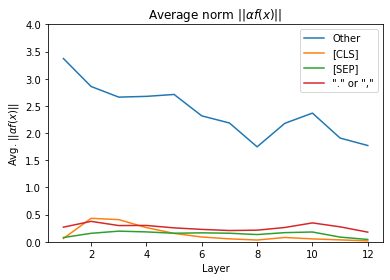

In [7]:
plt.figure()
i = 0
label = ["Other", "[CLS]", "[SEP]", '"." or ","']
cls_afx_layer_lis = torch.load("./work/re-examine/cls_afx_layer_lis")
sep_afx_layer_lis = torch.load("./work/re-examine/sep_afx_layer_lis")
cp_afx_layer_lis = torch.load("./work/re-examine/cp_afx_layer_lis")
other_afx_layer_lis = torch.load("./work/re-examine/other_afx_layer_lis")
for afx in [other_afx_layer_lis, cls_afx_layer_lis, sep_afx_layer_lis, cp_afx_layer_lis]:
    plt.plot(list(range(1,13)), afx, label=label[i])
    plt.ylim(0,4)
    i += 1
plt.xlabel("Layer")
plt.ylabel("Avg. $||αf(x)||$")
plt.title("Average norm $||αf(x)||$")
plt.legend()
plt.show()

## Comparison in a head-level

---------- [CLS] ----------
attention weight α


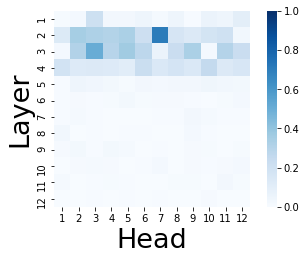


norm of transformed vector ||f(x)||


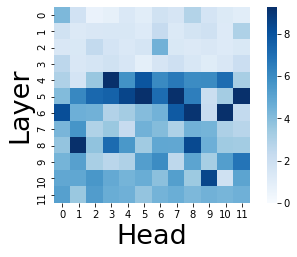


norm of weighted vector ||αf(x)||


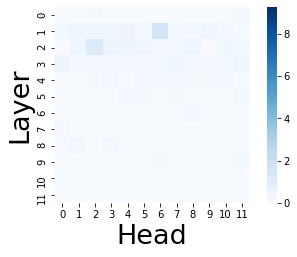


---------- [SEP] ----------
attention weight α


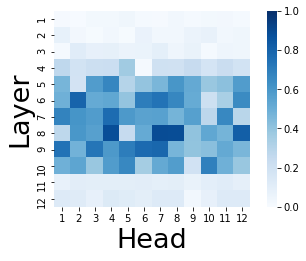


norm of transformed vector ||f(x)||


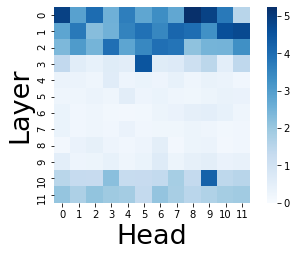


norm of weighted vector ||αf(x)||


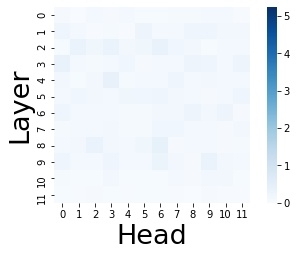


---------- "." or "," ----------
attention weight α


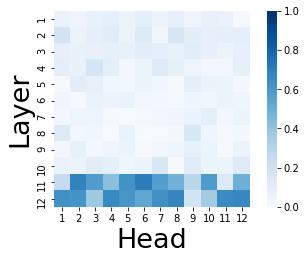


norm of transformed vector ||f(x)||


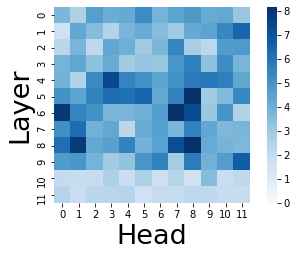


norm of weighted vector ||αf(x)||


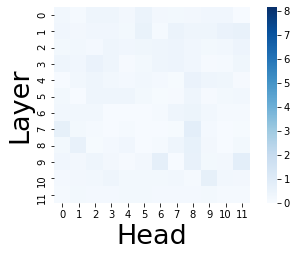


---------- Other ----------
attention weight α


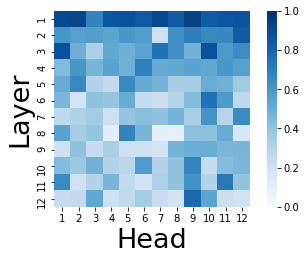


norm of transformed vector ||f(x)||


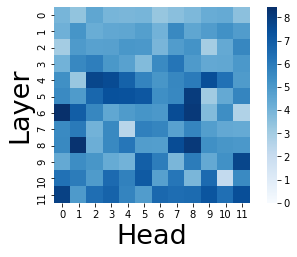


norm of weighted vector ||αf(x)||


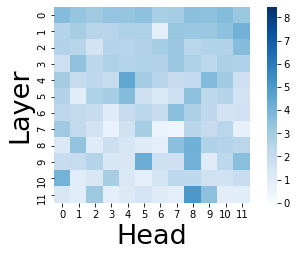

In [8]:
cls_lists = [torch.load("./work/re-examine/cls_a_head_lis"), torch.load("./work/re-examine/cls_fx_head_lis"), torch.load("./work/re-examine/cls_afx_head_lis")]
sep_lists = [torch.load("./work/re-examine/sep_a_head_lis"), torch.load("./work/re-examine/sep_fx_head_lis"), torch.load("./work/re-examine/sep_afx_head_lis")]
cp_lists = [torch.load("./work/re-examine/cp_a_head_lis"), torch.load("./work/re-examine/cp_fx_head_lis"), torch.load("./work/re-examine/cp_afx_head_lis")]
other_lists = [torch.load("./work/re-examine/other_a_head_lis"), torch.load("./work/re-examine/other_fx_head_lis"), torch.load("./work/re-examine/other_afx_head_lis")]

i = 0
fs = 27
label = ["[CLS]", "[SEP]", '"." or ","', "Other"]
pref = ["cls", "sep", "cp", "other"]

for a, fx, afx in [cls_lists, sep_lists, cp_lists, other_lists]:
    print("----------",label[i],"----------")
    print("attention weight α")
    plt.figure()
    df = pd.DataFrame(a, columns=range(1,13), index=range(1,13))
    sns.heatmap(df,vmax=1,vmin=0,cmap="Blues",square=True)
    plt.xlabel('Head',fontsize=fs)
    plt.ylabel('Layer',fontsize=fs)
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.show()
    
    print("\nnorm of transformed vector ||f(x)||")
    plt.figure()
    max_norm = max(max(fx))
    df = pd.DataFrame(fx)
    sns.heatmap(df,vmin=0,vmax=max_norm,cmap="Blues",square=True)
    plt.xlabel('Head',fontsize=fs)
    plt.ylabel('Layer',fontsize=fs)
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.show()
    
    print("\nnorm of weighted vector ||αf(x)||")
    plt.figure()
    df = pd.DataFrame(afx)
    sns.heatmap(df,vmin=0,vmax=max_norm,cmap="Blues",square=True)
    plt.xlabel('Head',fontsize=fs)
    plt.ylabel('Layer',fontsize=fs)
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.show()
    i += 1
    print()

## Relationship between $\alpha$ and $\lVert f(x)\rVert$  (Recommend to run on a device with large memory (160GB~))

In [9]:
cls_attention = torch.load("./work/relation_between_alpha_fx/cls_attention.pt")
cls_fx = torch.load("./work/relation_between_alpha_fx/cls_fx.pt")
sep_attention = torch.load("./work/relation_between_alpha_fx/sep_attention.pt")
sep_fx = torch.load("./work/relation_between_alpha_fx/sep_fx.pt")
cp_attention = torch.load("./work/relation_between_alpha_fx/cp_attention.pt")
cp_fx = torch.load("./work/relation_between_alpha_fx/cp_fx.pt")
other_attention = torch.load("./work/relation_between_alpha_fx/other_attention.pt")
other_fx = torch.load("./work/relation_between_alpha_fx/other_fx.pt")

print("-"*100)
print("[CLS]")
print("pearsonr: ", pearsonr(cls_attention, cls_fx))
print("spearmanr: ", spearmanr(cls_attention, cls_fx))

print("-"*100)
print("[SEP]")
print("pearsonr: ", pearsonr(sep_attention, sep_fx))
print("spearmanr: ", spearmanr(sep_attention, sep_fx))

print("-"*100)
print("Periods or commas")
print("pearsonr: ", pearsonr(cp_attention, cp_fx))
print("spearmanr: ", spearmanr(cp_attention, cp_fx))

print("-"*100)
print("Others")
print("pearsonr: ", pearsonr(other_attention, other_fx))
print("spearmanr: ", spearmanr(other_attention, other_fx))

----------------------------------------------------------------------------------------------------
[CLS]
pearsonr:  (-0.34368478479841924, 0.0)
spearmanr:  SpearmanrResult(correlation=-0.34563202405834353, pvalue=0.0)
----------------------------------------------------------------------------------------------------
[SEP]
pearsonr:  (-0.5805716543419958, 0.0)
spearmanr:  SpearmanrResult(correlation=-0.6930173936506744, pvalue=0.0)
----------------------------------------------------------------------------------------------------
Periods or commas
pearsonr:  (-0.4039248612173334, 0.0)
spearmanr:  SpearmanrResult(correlation=-0.2529883056190972, pvalue=0.0)
----------------------------------------------------------------------------------------------------
Others
pearsonr:  (-0.030255122119787294, 0.0)
spearmanr:  SpearmanrResult(correlation=0.05839998384129244, pvalue=0.0)


In [10]:
# randomly select 1%
p_cls = random.sample(range(len(cls_attention)),int(len(cls_attention)/100))
p_sep = random.sample(range(len(sep_attention)),int(len(sep_attention)/100))
p_pc = random.sample(range(len(cp_attention)),int(len(cp_attention)/100))
p_other = random.sample(range(len(other_attention)),int(len(other_attention)/100))

# set color map
cmap = plt.get_cmap("tab10")

# set font size
fs = 32
fs2 = 25

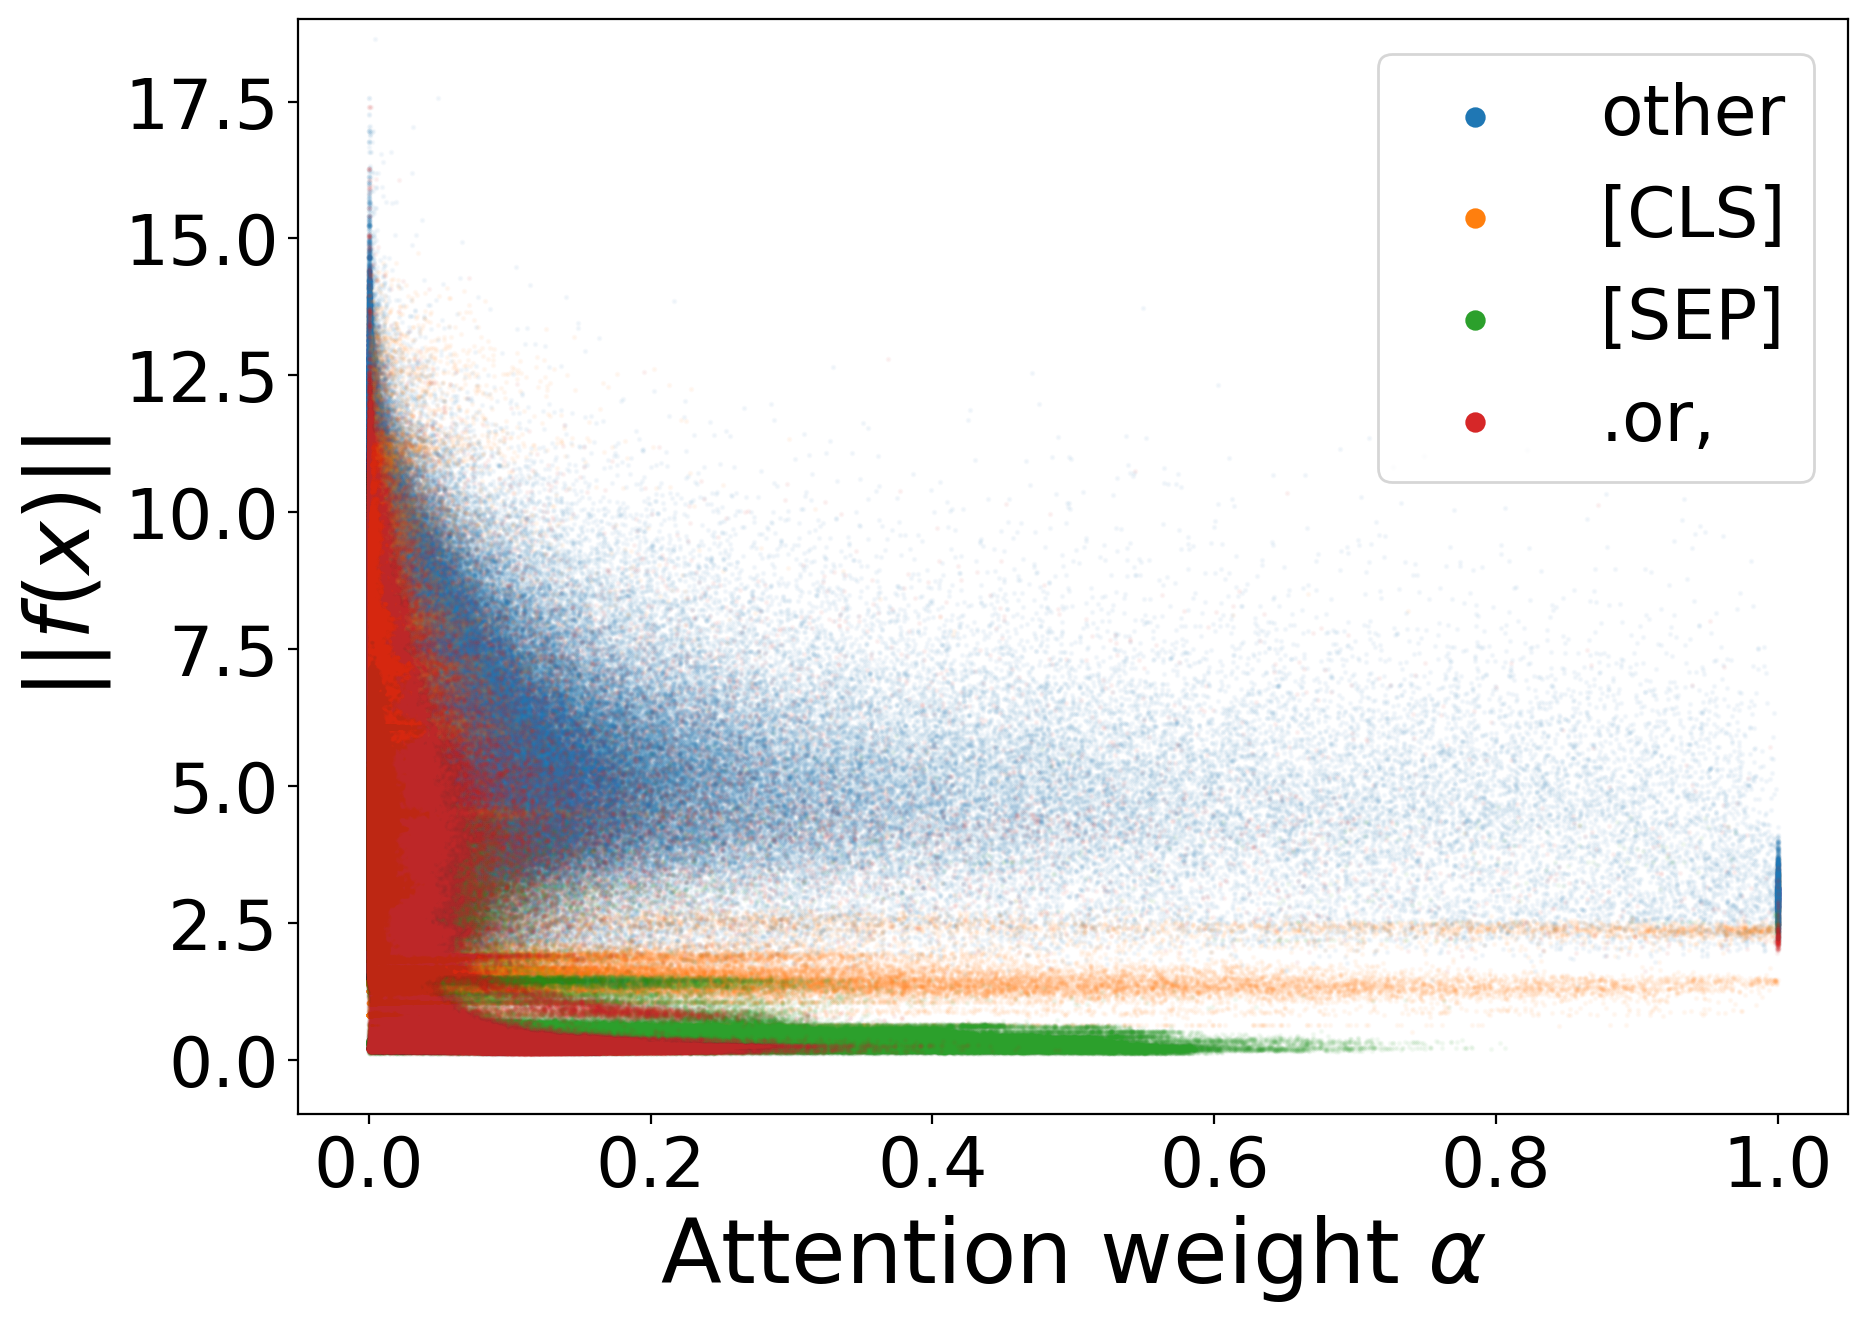

In [13]:
plt.figure(figsize=(10,7.5),dpi=200)
plt.scatter(other_attention[p_other], other_fx[p_other], s=1, alpha=0.04, c=[cmap(0)], label="other")
plt.scatter(cls_attention[p_cls], cls_fx[p_cls], s=1, alpha=0.04, c=[cmap(1)], label="[CLS]")
plt.scatter(sep_attention[p_sep], sep_fx[p_sep], s=1, alpha=0.04, c=[cmap(2)], label="[SEP]")
plt.scatter(cp_attention[p_pc], cp_fx[p_pc], s=1, alpha=0.04, c=[cmap(3)], label=".or,")
plt.ylim(-1,19)
plt.xlim(-0.05,1.05)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.xlabel('Attention weight $α$', fontsize=fs)
plt.ylabel('$||f(x)||$', fontsize=fs)
leg = plt.legend(fontsize=fs2)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([40.0])
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

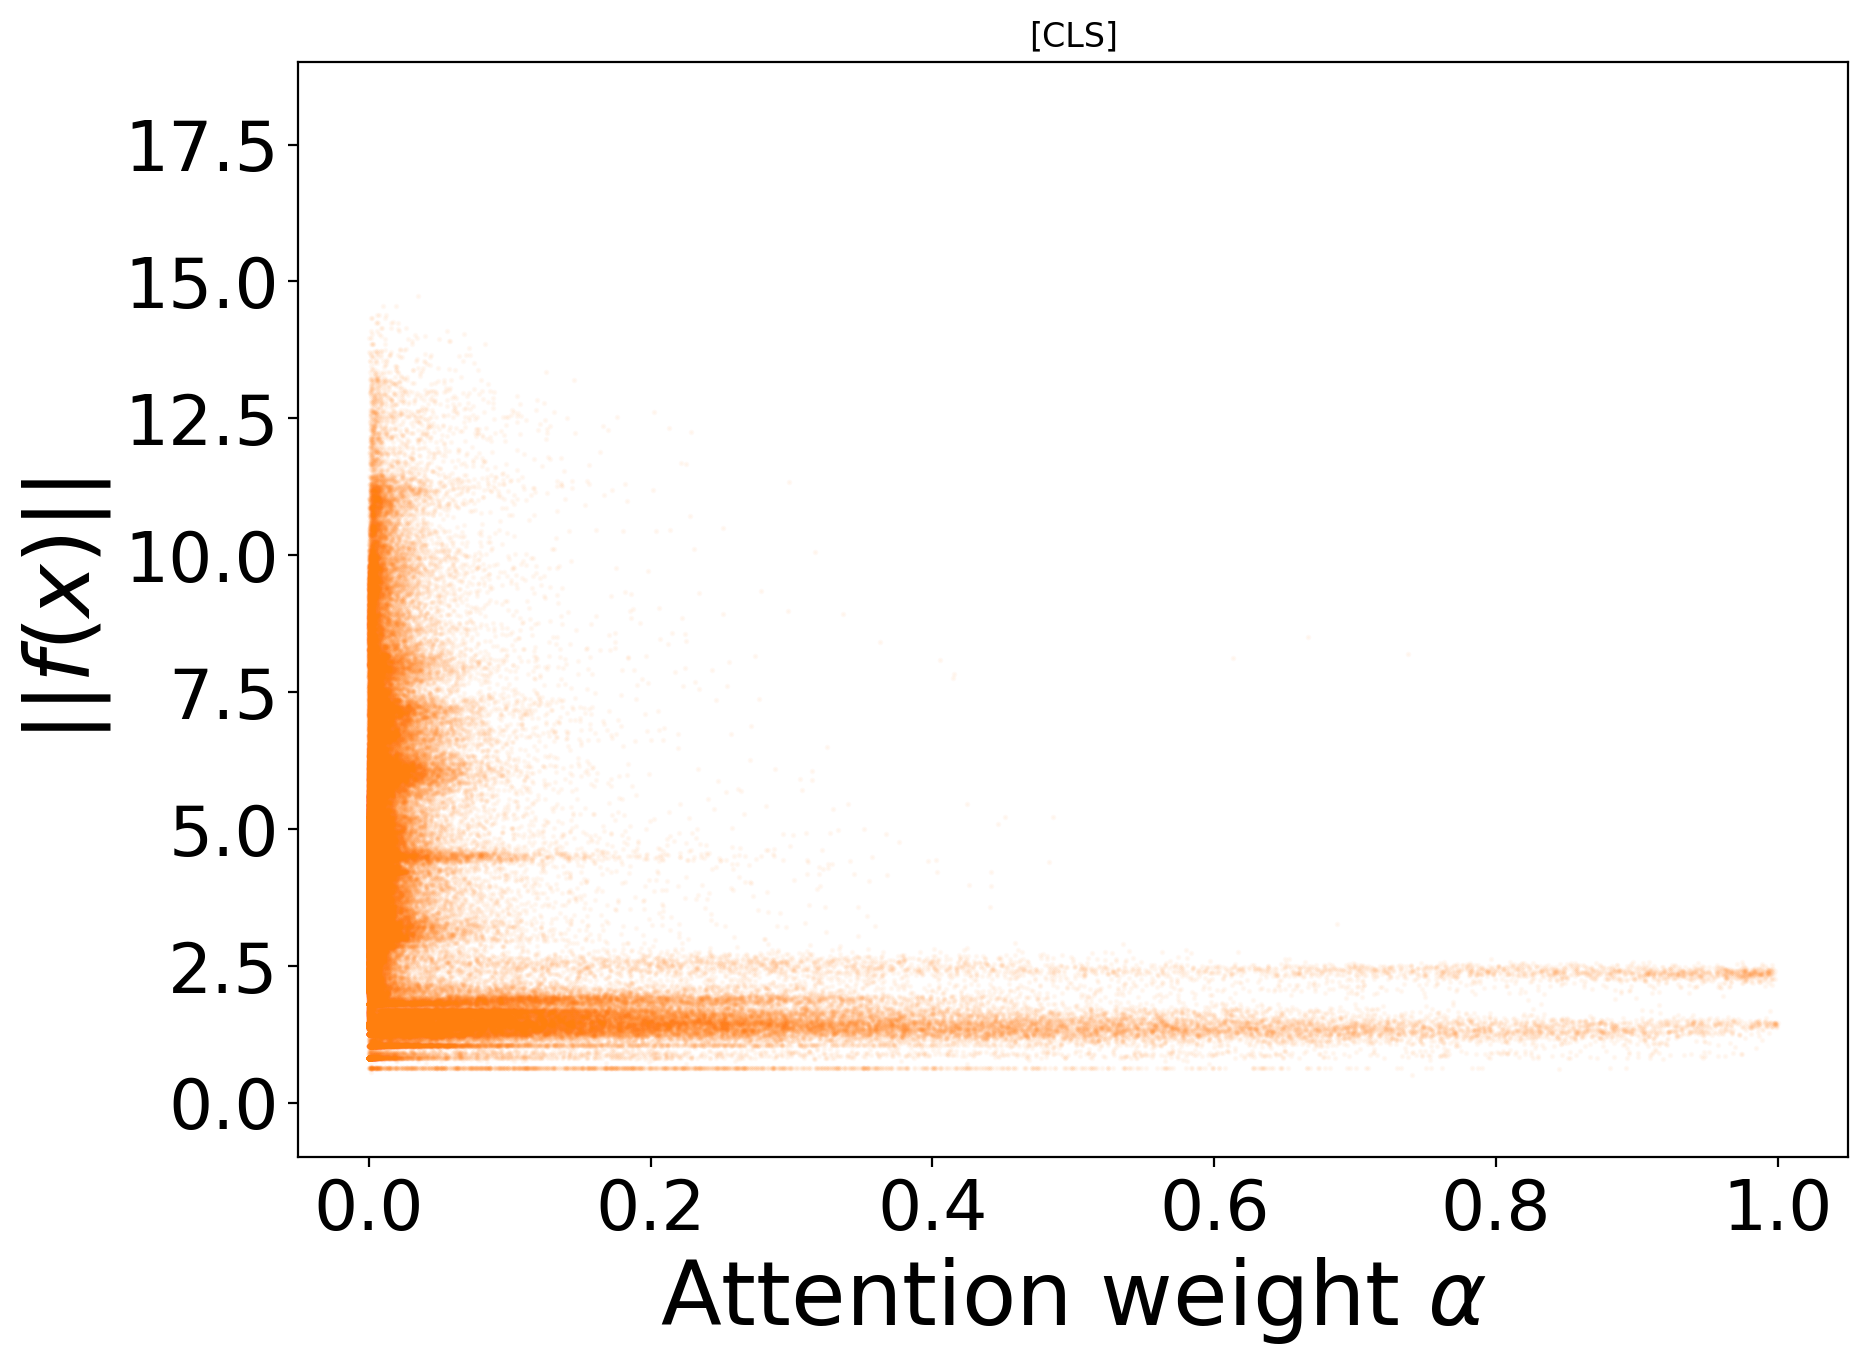

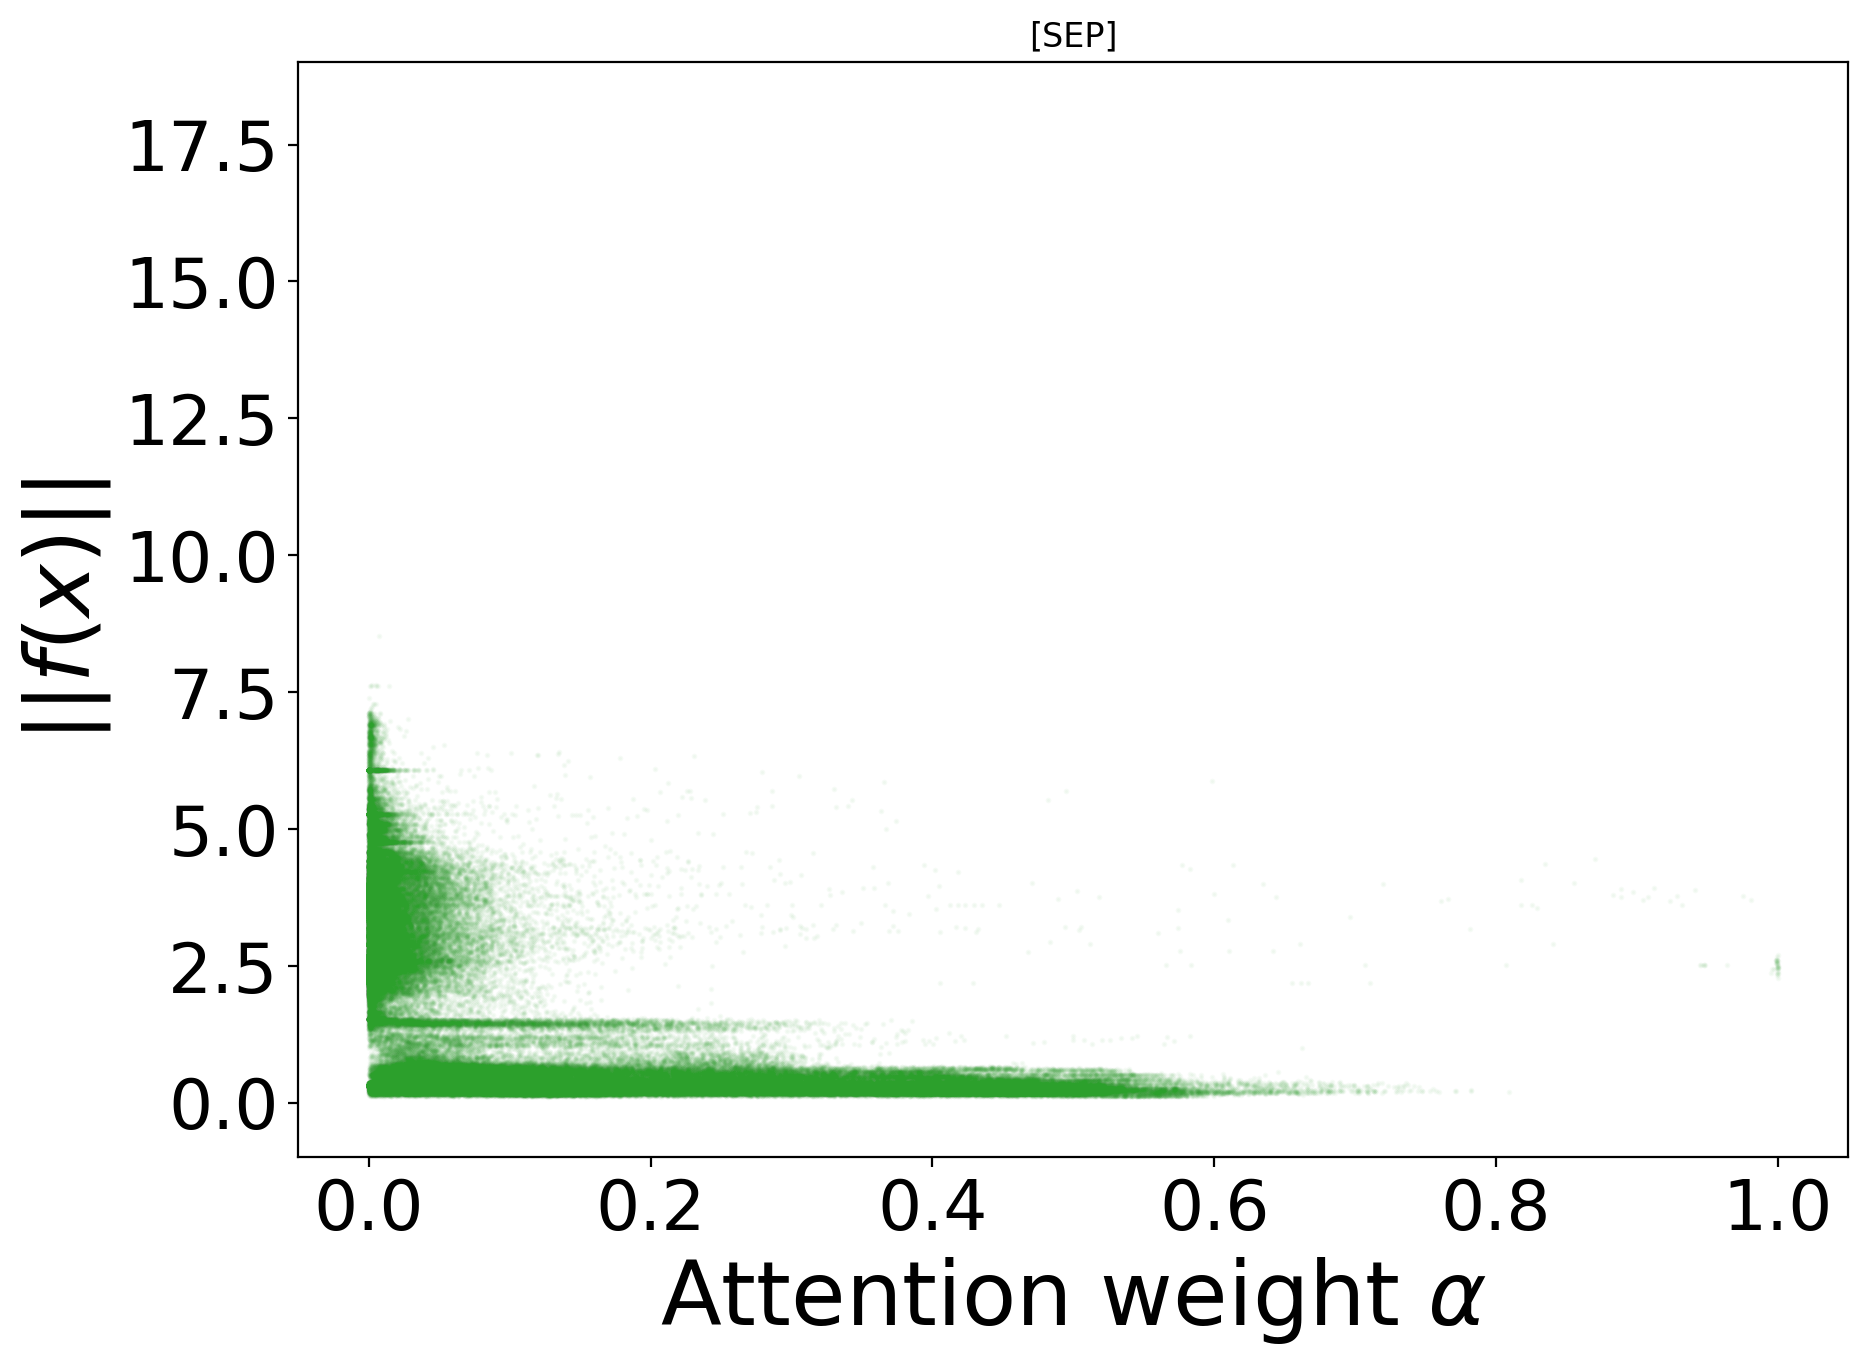

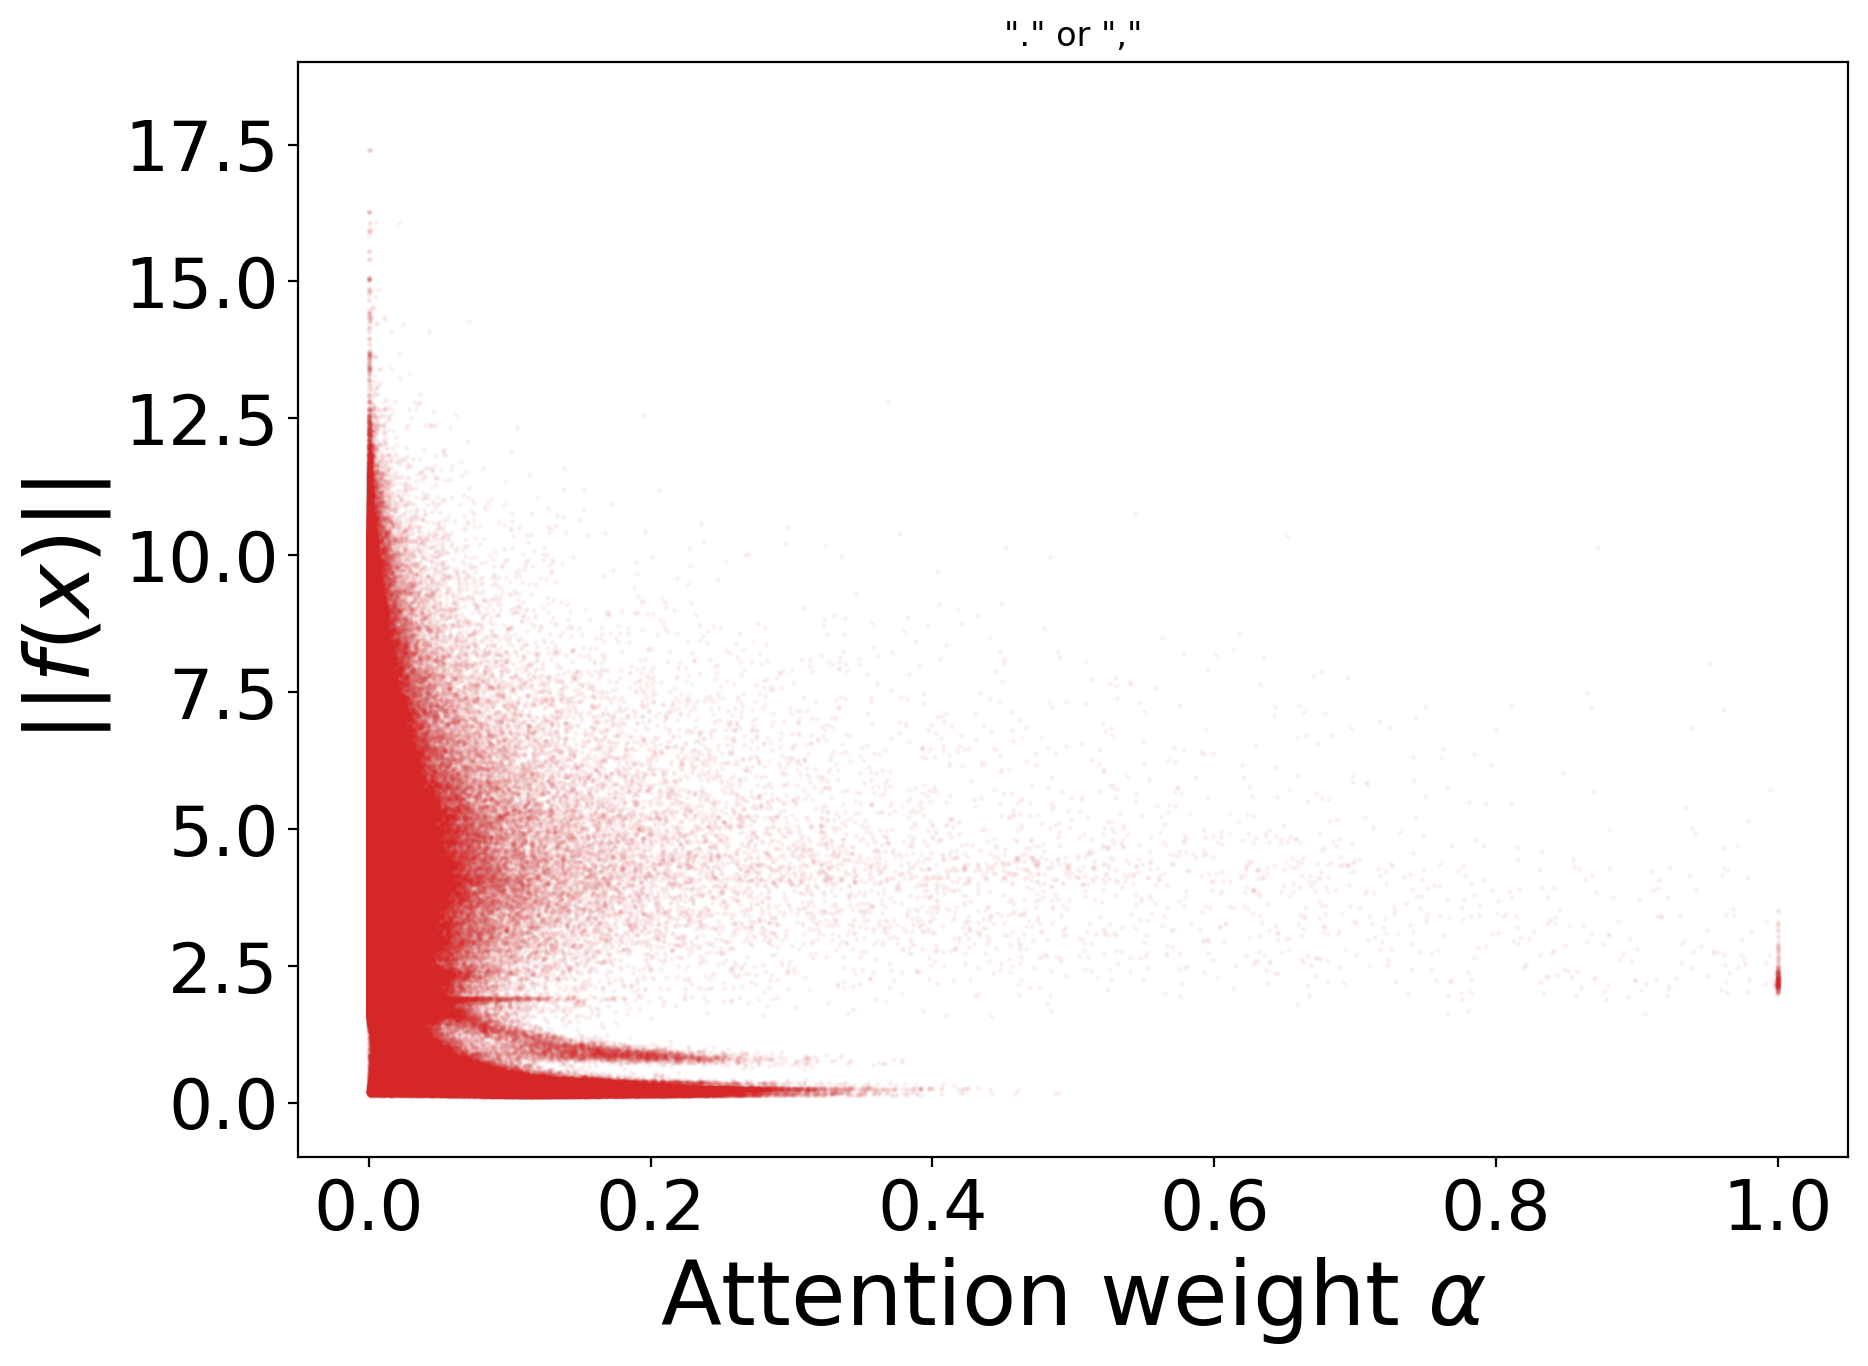

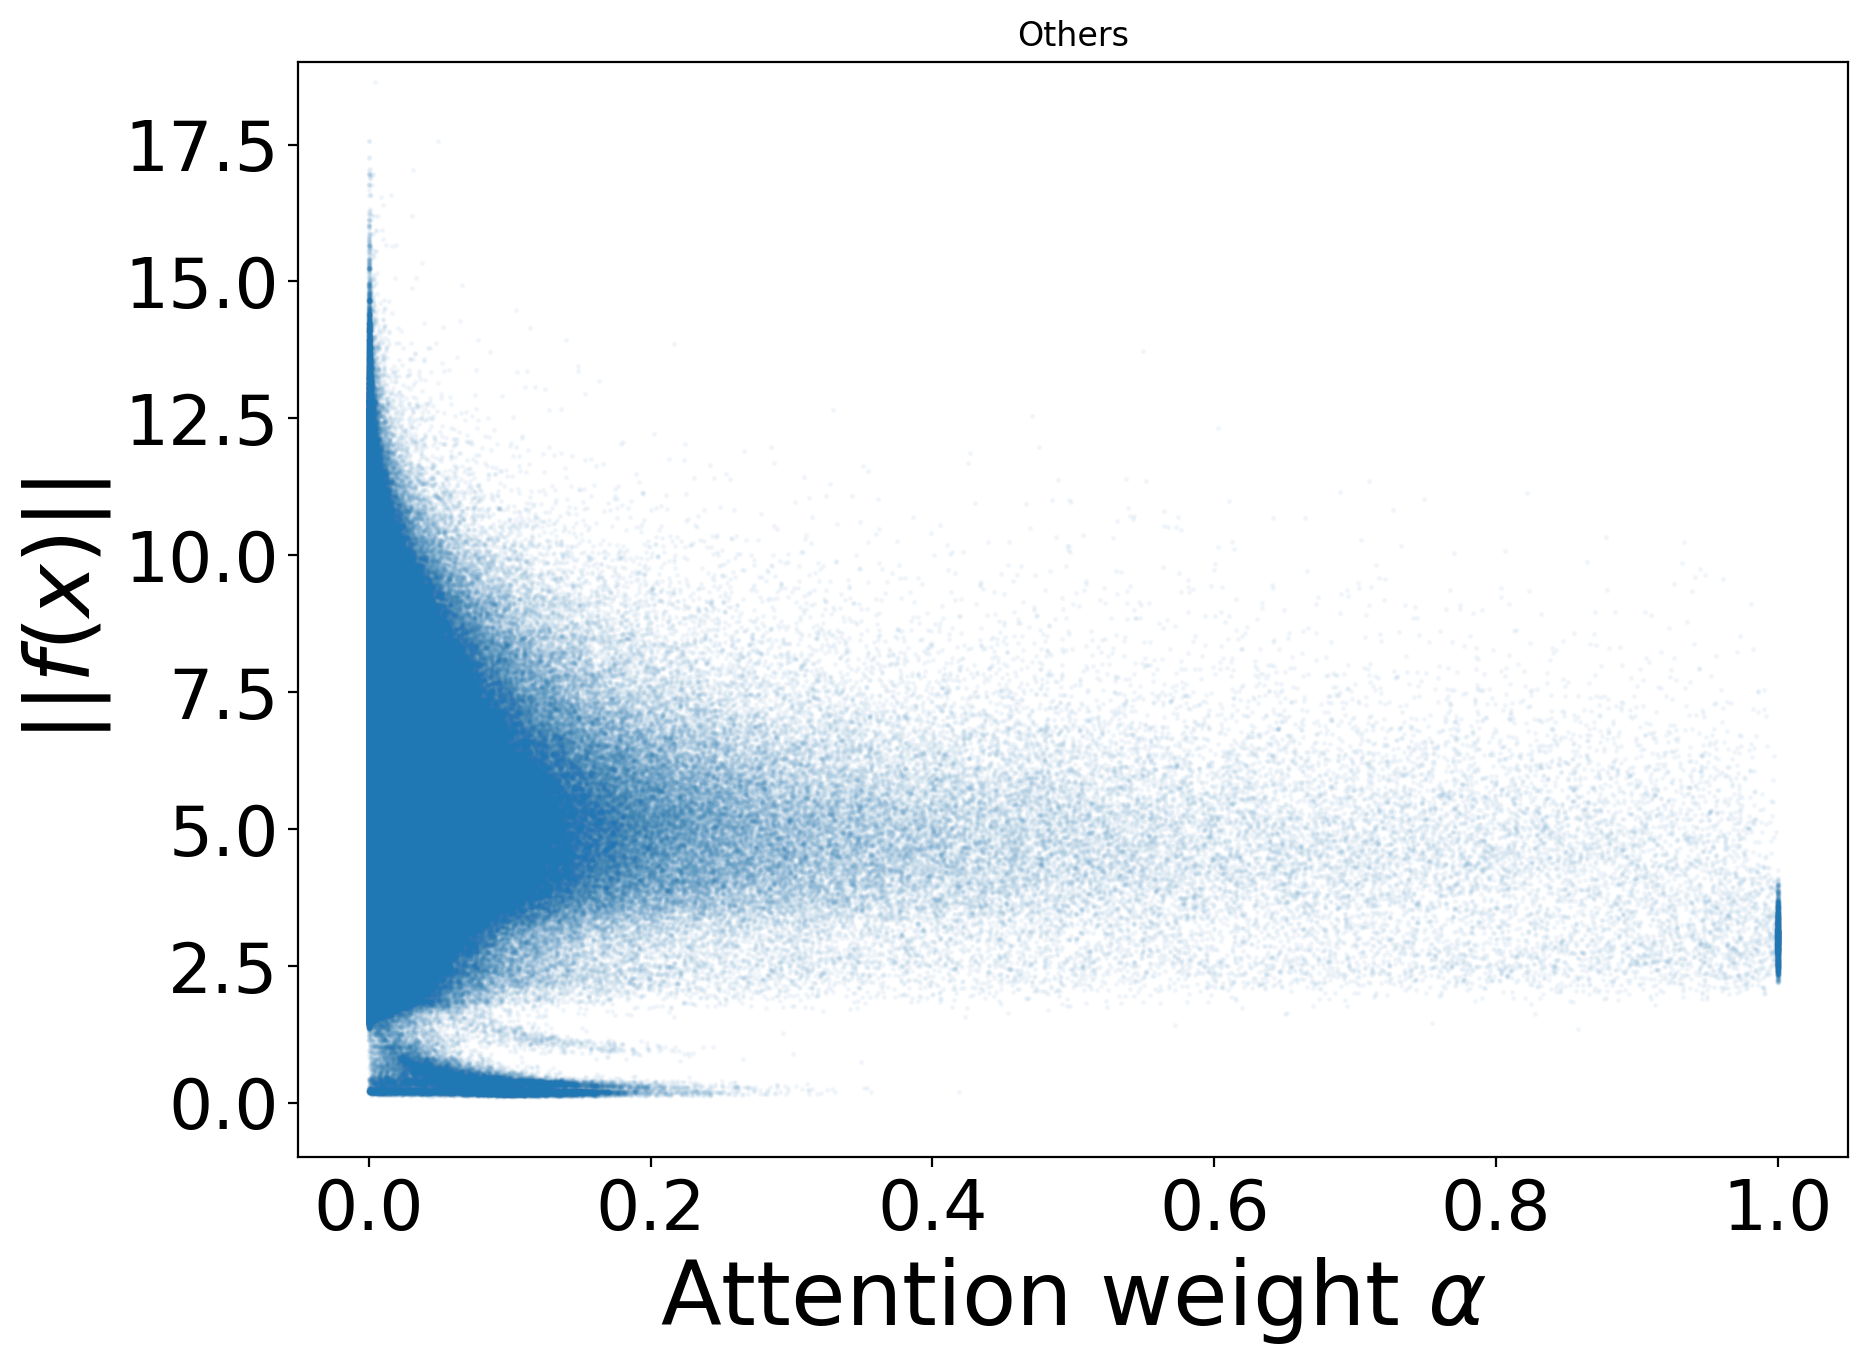

In [14]:
# CLS
plt.figure(figsize=(10,7.5),dpi=200)
plt.scatter(cls_attention[p_cls], cls_fx[p_cls], s=1, alpha=0.04, c=[cmap(1)])
plt.ylim(-1,19)
plt.xlim(-0.05,1.05)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.xlabel('Attention weight $α$', fontsize=fs)
plt.ylabel('$||f(x)||$', fontsize=fs)
plt.title('[CLS]')
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

# SEP
plt.figure(figsize=(10,7.5),dpi=200)
plt.scatter(sep_attention[p_cls], sep_fx[p_cls], s=1, alpha=0.04, c=[cmap(2)])
plt.ylim(-1,19)
plt.xlim(-0.05,1.05)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.xlabel('Attention weight $α$', fontsize=fs)
plt.ylabel('$||f(x)||$', fontsize=fs)
plt.title('[SEP]')
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

# . or ,
plt.figure(figsize=(10,7.5),dpi=200)
plt.scatter(cp_attention[p_pc], cp_fx[p_pc], s=1, alpha=0.04, c=[cmap(3)])
plt.ylim(-1,19)
plt.xlim(-0.05,1.05)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.xlabel('Attention weight $α$', fontsize=fs)
plt.ylabel('$||f(x)||$', fontsize=fs)
plt.title('"." or ","')
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

# other
plt.figure(figsize=(10,7.5),dpi=200)
plt.scatter(other_attention[p_other], other_fx[p_other], s=1, alpha=0.04, c=[cmap(0)])
plt.ylim(-1,19)
plt.xlim(-0.05,1.05)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.xlabel('Attention weight $α$', fontsize=fs)
plt.ylabel('$||f(x)||$', fontsize=fs)
plt.title('Others')
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

# Section 4.3: Relation between frequency and $\lVert f(x)\rVert$

In [15]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
pad_id = torch.tensor(tokenizer.convert_tokens_to_ids("[PAD]"))
cls_id = torch.tensor(tokenizer.convert_tokens_to_ids("[CLS]"))
sep_id = torch.tensor(tokenizer.convert_tokens_to_ids("[SEP]"))
comma_id = torch.tensor(tokenizer.convert_tokens_to_ids(","))
period_id = torch.tensor(tokenizer.convert_tokens_to_ids("."))

input_ids = torch.load("./work/input_ids.pt")
input_rank = torch.load('./work/relation_with_freq/input_rank.pt')
input_count = torch.load('./work/relation_with_freq/input_count.pt')
ids = input_ids[input_ids!=pad_id]
rank = input_rank[input_ids!=pad_id]
count = input_count[input_ids!=pad_id]

a_tensor = torch.load('./work/relation_with_freq/all_token_mean_a.pt')
fx_tensor = torch.load('./work/relation_with_freq/all_token_mean_fx.pt')

In [16]:
print("-"*100)
print("All tokens")
print("-"*100)
print("count-α spearmanr:")
print(spearmanr(count, a_tensor))

print("rank-α spearmanr:")
print(spearmanr(rank, a_tensor))

print("-"*100)
print("count-f(x) spearmanr:")
print(spearmanr(count, fx_tensor))

print("rank-f(x) spearmanr:")
print(spearmanr(rank, fx_tensor))
print("-"*100)
print("-"*100)

print("without special tokens, periods, and commas")
print("-"*100)
removed_a_tensor = []
removed_fx_tensor = []
removed_rank_tensor = []
removed_count_tensor = []

for i in [cls_id, sep_id, period_id, comma_id]:
    removed_a_tensor.append(a_tensor[ids==i])
    removed_fx_tensor.append(fx_tensor[ids==i])
    removed_rank_tensor.append(rank[ids==i])
    removed_count_tensor.append(count[ids==i])
    a_tensor = a_tensor[ids != i]
    fx_tensor = fx_tensor[ids != i]
    rank = rank[ids != i]
    count = count[ids != i]
    ids = ids[ids != i]

print("count-α spearmanr:")
print(spearmanr(count, a_tensor))

print("rank-α spearmanr:")
print(spearmanr(rank, a_tensor))

print("-"*100)
print("count-f(x) spearmanr:")
print(spearmanr(count, fx_tensor))

print("rank-f(x) spearmanr:")
print(spearmanr(rank, fx_tensor))

----------------------------------------------------------------------------------------------------
All tokens
----------------------------------------------------------------------------------------------------
count-α spearmanr:
SpearmanrResult(correlation=-0.06279919703562309, pvalue=4.190860065212114e-106)
rank-α spearmanr:
SpearmanrResult(correlation=0.06279919703562309, pvalue=4.190860065212114e-106)
----------------------------------------------------------------------------------------------------
count-f(x) spearmanr:
SpearmanrResult(correlation=-0.7469432368166085, pvalue=0.0)
rank-f(x) spearmanr:
SpearmanrResult(correlation=0.7469432368166085, pvalue=0.0)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
without special tokens, periods, and commas
------------------------------------------------------------------------------

In [17]:
# set the font size
fs = 32
fs2 = 25

# set the color map
cmap = plt.get_cmap("tab10")

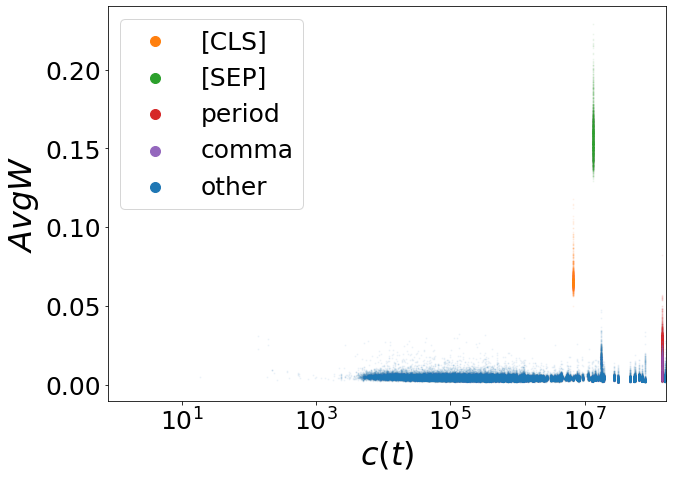

In [18]:
plt.figure(figsize=(10,7.5))
plt.scatter(removed_count_tensor[0], removed_a_tensor[0], s=1, alpha=0.05,label="[CLS]", color = cmap(1))
plt.scatter(removed_count_tensor[1], removed_a_tensor[1], s=1, alpha=0.05,label="[SEP]", color = cmap(2))
plt.scatter(removed_count_tensor[2], removed_a_tensor[2], s=1, alpha=0.05,label="period", color = cmap(3))
plt.scatter(removed_count_tensor[3], removed_a_tensor[3], s=1, alpha=0.05,label="comma", color = cmap(4))
plt.scatter(count, a_tensor, s=1, alpha=0.05,label="other", color = cmap(0))
leg = plt.legend(fontsize=fs2)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([100])
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.xlim(0.8,)
plt.xscale('log')
plt.xlabel('$c(t)$',fontsize=fs)
plt.ylabel('$AvgW$',fontsize=fs)
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

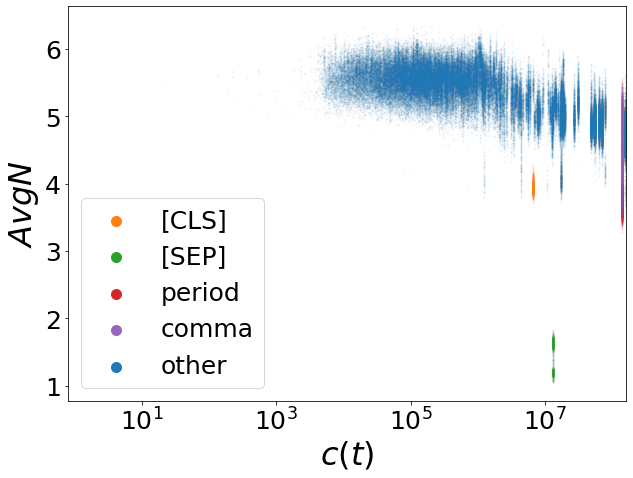

In [19]:
plt.figure(figsize=(10,7.5))
plt.scatter(removed_count_tensor[0], removed_fx_tensor[0], s=1, alpha=0.05,label="[CLS]", color = cmap(1))
plt.scatter(removed_count_tensor[1], removed_fx_tensor[1], s=1, alpha=0.05,label="[SEP]", color = cmap(2))
plt.scatter(removed_count_tensor[2], removed_fx_tensor[2], s=1, alpha=0.05,label='period', color = cmap(3))
plt.scatter(removed_count_tensor[3], removed_fx_tensor[3], s=1, alpha=0.05,label="comma", color = cmap(4))
plt.scatter(count, fx_tensor, s=1, alpha=0.05,label="other", color = cmap(0))
leg = plt.legend(fontsize=fs2)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([100])
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.xlim(0.8,)
plt.xscale('log')
plt.xlabel('$c(t)$',fontsize=fs)
plt.ylabel('$AvgN$',fontsize=fs)
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

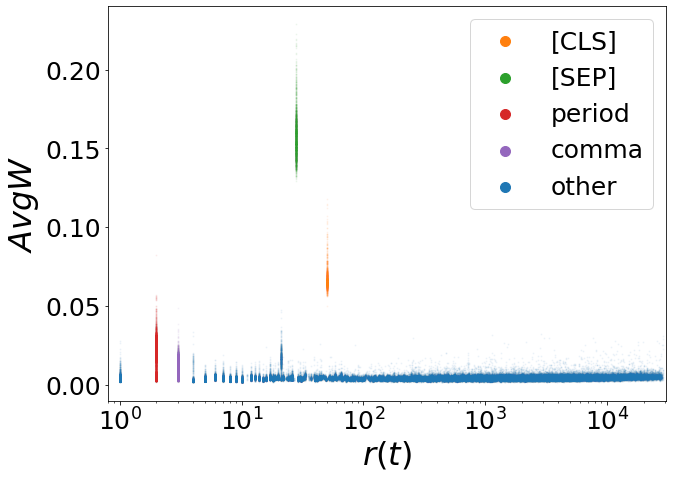

In [20]:
plt.figure(figsize=(10,7.5))
plt.scatter(removed_rank_tensor[0], removed_a_tensor[0], s=1, alpha=0.05,label="[CLS]", color = cmap(1))
plt.scatter(removed_rank_tensor[1], removed_a_tensor[1], s=1, alpha=0.05,label="[SEP]", color = cmap(2))
plt.scatter(removed_rank_tensor[2], removed_a_tensor[2], s=1, alpha=0.05,label='period', color = cmap(3))
plt.scatter(removed_rank_tensor[3], removed_a_tensor[3], s=1, alpha=0.05,label="comma", color = cmap(4))
plt.scatter(rank, a_tensor, s=1, alpha=0.05,label="other", color = cmap(0))
leg = plt.legend(fontsize=fs2)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([100])
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.xlim(0.8,)
plt.xscale('log')
plt.xlabel('$r(t)$',fontsize=fs)
plt.ylabel('$AvgW$',fontsize=fs)
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

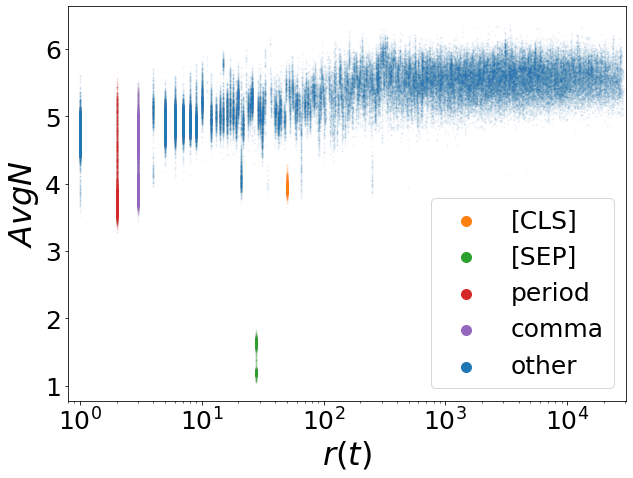

In [21]:
plt.figure(figsize=(10,7.5))
plt.scatter(removed_rank_tensor[0], removed_fx_tensor[0], s=1, alpha=0.05,label="[CLS]", color = cmap(1))
plt.scatter(removed_rank_tensor[1], removed_fx_tensor[1], s=1, alpha=0.05,label="[SEP]", color = cmap(2))
plt.scatter(removed_rank_tensor[2], removed_fx_tensor[2], s=1, alpha=0.05,label='period', color = cmap(3))
plt.scatter(removed_rank_tensor[3], removed_fx_tensor[3], s=1, alpha=0.05,label="comma", color = cmap(4))
plt.scatter(rank, fx_tensor, s=1, alpha=0.05,label="other", color = cmap(0))
leg = plt.legend(fontsize=fs2)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([100])
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.xlim(0.8,)
plt.xscale('log')
plt.xlabel('$r(t)$',fontsize=fs)
plt.ylabel('$AvgN$',fontsize=fs)
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()